In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("./merged_pre_processed.csv", low_memory=False)

In [10]:
df.head()

,Unnamed: 0,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,613404,59.166.0.7,27382,149.171.126.8,53,udp,CON,0.001046,132,164,...,,2,3,1,9,1,1,1,Normal,0
1,671852,149.171.126.18,47439,175.45.176.3,53,udp,INT,0.000007,264,0,...,,57,57,56,56,56,20,57,Normal,0
2,391447,59.166.0.7,15578,149.171.126.1,34872,tcp,FIN,0.009837,2438,18508,...,,3,2,3,6,1,1,1,Normal,0
3,591363,175.45.176.0,16421,149.171.126.15,179,tcp,FIN,1.887100,1006,702,...,,5,2,1,2,2,1,2,Normal,0
4,478920,59.166.0.2,33699,149.171.126.2,5190,tcp,FIN,0.004115,1036,2262,...,,7,7,3,3,2,1,3,Normal,0


In [11]:
df.drop(["Unnamed: 0"], axis=1,inplace=True)

In [12]:
df.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.7,27382,149.171.126.8,53,udp,CON,0.001046,132,164,31,...,,2,3,1,9,1,1,1,Normal,0
1,149.171.126.18,47439,175.45.176.3,53,udp,INT,0.000007,264,0,60,...,,57,57,56,56,56,20,57,Normal,0
2,59.166.0.7,15578,149.171.126.1,34872,tcp,FIN,0.009837,2438,18508,31,...,,3,2,3,6,1,1,1,Normal,0
3,175.45.176.0,16421,149.171.126.15,179,tcp,FIN,1.887100,1006,702,254,...,,5,2,1,2,2,1,2,Normal,0
4,59.166.0.2,33699,149.171.126.2,5190,tcp,FIN,0.004115,1036,2262,31,...,,7,7,3,3,2,1,3,Normal,0


In [6]:
df.tail()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
92744,175.45.176.3,1043,149.171.126.18,53,udp,INT,0.000003,114,0,254,...,,34,34,19,19,19,19,34,Generic,1
92745,175.45.176.1,13540,149.171.126.10,80,tcp,FIN,3.393675,1194,3802,62,...,,2,1,1,1,1,1,1,Generic,1
92746,175.45.176.0,34233,149.171.126.15,1723,tcp,FIN,0.586488,756,268,254,...,,6,2,1,2,1,1,2,Fuzzers,1
92747,175.45.176.1,61247,149.171.126.17,110,tcp,FIN,2.014088,978,2844,62,...,,1,1,1,1,1,1,2,Exploits,1
92748,175.45.176.1,6870,149.171.126.17,80,tcp,FIN,0.771105,840,2026,62,...,,2,1,1,1,1,1,2,DoS,1


In [13]:
df.dtypes

srcip                object
sport                 int64
dstip                object
dsport               object
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports     

### Data Correlation

In [14]:
categorical_columns = ['srcip', 'dstip', 'proto', 'dsport', 'state', 'service', 'ct_ftp_cmd', 'attack_cat', ]
# categorical_columns = [ 'proto',  'state', 'service', 'ct_ftp_cmd', 'attack_cat', ]

In [15]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

df2 = df.copy()

df2[categorical_columns] = enc.fit_transform(df2[categorical_columns])

In [16]:
df2.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,32.0,27382,24.0,9347.0,117.0,2.0,0.001046,132,164,31,...,0.0,2,3,1,9,1,1,1,8.0,0
1,12.0,47439,29.0,9347.0,117.0,5.0,0.000007,264,0,60,...,0.0,57,57,56,56,56,20,57,8.0,0
2,32.0,15578,7.0,5466.0,111.0,4.0,0.009837,2438,18508,31,...,0.0,3,2,3,6,1,1,1,8.0,0
3,21.0,16421,13.0,1821.0,111.0,4.0,1.887100,1006,702,254,...,0.0,5,2,1,2,2,1,2,8.0,0
4,27.0,33699,18.0,9099.0,111.0,4.0,0.004115,1036,2262,31,...,0.0,7,7,3,3,2,1,3,8.0,0


In [17]:
df2.dtypes

srcip               float64
sport                 int64
dstip               float64
dsport              float64
proto               float64
state               float64
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service             float64
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports     

In [18]:
df2.corr()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
srcip,1.000000,0.191206,0.324225,0.051783,0.103461,-0.550512,-0.070278,-0.002834,0.106759,-0.604387,...,0.505591,-0.333861,-0.334316,-0.244694,-0.256686,-0.325884,-0.350951,-0.415023,0.347888,-0.628910
sport,0.191206,1.000000,0.067861,0.224578,0.216904,-0.249923,-0.025382,0.011283,0.044423,-0.260891,...,0.168269,-0.077667,-0.081557,-0.074704,-0.123739,-0.101400,-0.139102,-0.110676,0.083873,-0.236604
dstip,0.324225,0.067861,1.000000,0.021820,0.039138,-0.290781,-0.030037,-0.004235,0.055527,-0.479346,...,0.299979,-0.101303,-0.102351,-0.031422,-0.040011,-0.078846,-0.084401,-0.154126,0.301519,-0.526779
dsport,0.051783,0.224578,0.021820,1.000000,0.357053,-0.063917,-0.082095,-0.020010,0.099063,-0.120110,...,0.023648,0.305719,0.308814,0.293000,0.214741,0.284459,0.258044,0.285294,0.328291,-0.103665
proto,0.103461,0.216904,0.039138,0.357053,1.000000,-0.120553,-0.145414,-0.000500,0.002388,-0.076748,...,0.042482,0.208470,0.207085,0.192435,0.153597,0.173657,0.162511,0.180105,0.144476,-0.082655
state,-0.550512,-0.249923,-0.290781,-0.063917,-0.120553,1.000000,0.000980,-0.029431,-0.040153,0.681951,...,-0.457978,0.451674,0.452041,0.360947,0.383107,0.427165,0.449799,0.506998,-0.256906,0.650307
dur,-0.070278,-0.025382,-0.030037,-0.082095,-0.145414,0.000980,1.000000,0.225267,0.211833,-0.003769,...,-0.002579,-0.113163,-0.113027,-0.091053,-0.095872,-0.085274,-0.085285,-0.102566,-0.097571,0.025444
sbytes,-0.002834,0.011283,-0.004235,-0.020010,-0.000500,-0.029431,0.225267,1.000000,0.014172,-0.015023,...,-0.007424,-0.030938,-0.031687,-0.025351,-0.023724,-0.023066,-0.023350,-0.028317,-0.008336,0.010864
dbytes,0.106759,0.044423,0.055527,0.099063,0.002388,-0.040153,0.211833,0.014172,1.000000,-0.142635,...,0.075441,-0.064673,-0.064473,-0.061356,-0.068652,-0.070369,-0.076262,-0.085347,0.070335,-0.116429
sttl,-0.604387,-0.260891,-0.479346,-0.120110,-0.076748,0.681951,-0.003769,-0.015023,-0.142635,1.000000,...,-0.621200,0.433052,0.433117,0.339154,0.368124,0.429409,0.455265,0.521561,-0.537299,0.911836


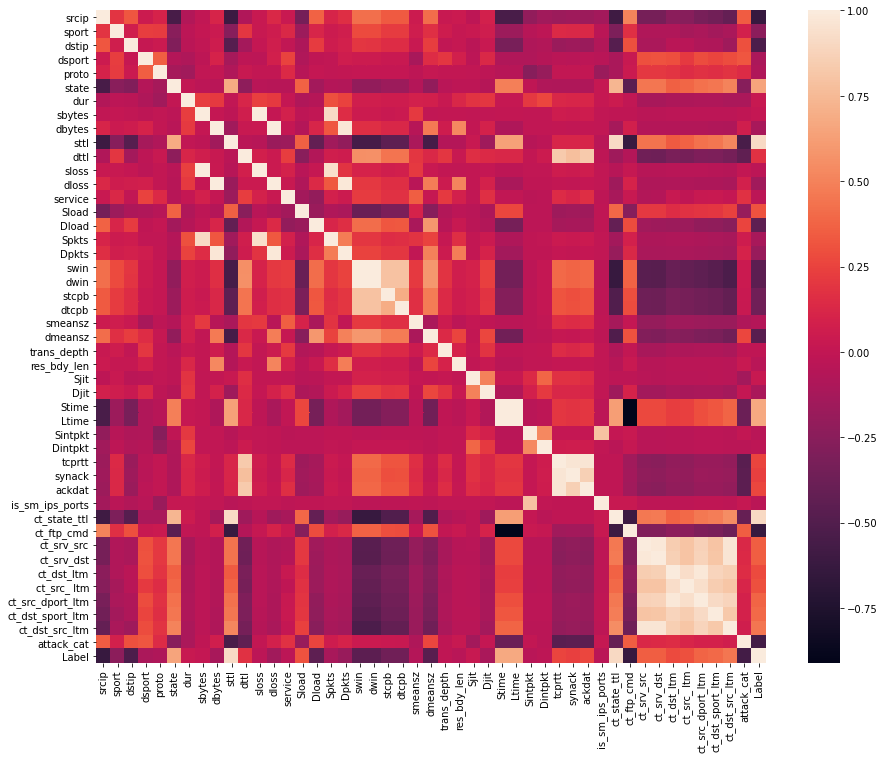

In [19]:
df2 = df2[[col for col in df2 if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df2.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

##### Dropping the columns the columns which have very less correlation with the end result
Those columns which have correlation between -0.3 to 0.3 will be dropped 
Also source and destination ip address columns are dropped as, they are in string format and even if they are encoded it will be inefficient

In [20]:
columns_drop = ['sport', 'dsport', 'proto', 'sbytes', 'dbytes', 'dur', 'ct_dst_ltm', 
                'is_sm_ips_ports', 'tcprtt', 'synack', 'ackdat', 'Sintpkt', 'Dintpkt',
               'Djit', 'Sjit', 'res_bdy_len','trans_depth', 'smeansz',
               'service', 'dloss', 'sloss', 'dttl', 'Spkts', 'Dpkts', 'srcip', 'dstip']

In [21]:
df = df.drop(columns_drop, axis=1)
df2 = df2.drop(columns_drop, axis=1)

In [22]:
df2.corr()

,state,sttl,Sload,Dload,swin,dwin,stcpb,dtcpb,dmeansz,Stime,...,ct_state_ttl,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
state,1.000000,0.681951,0.372953,-0.139438,-0.210945,-0.211921,-0.168780,-0.168572,-0.211968,0.487750,...,0.733285,-0.457978,0.451674,0.452041,0.383107,0.427165,0.449799,0.506998,-0.256906,0.650307
sttl,0.681951,1.000000,0.364946,-0.423595,-0.555231,-0.555738,-0.441433,-0.440788,-0.556643,0.636673,...,0.913427,-0.621200,0.433052,0.433117,0.368124,0.429409,0.455265,0.521561,-0.537299,0.911836
Sload,0.372953,0.364946,1.000000,-0.176396,-0.389773,-0.389814,-0.310207,-0.310356,-0.259846,0.264675,...,0.389334,-0.263095,0.204323,0.207338,0.175438,0.189484,0.195747,0.242074,-0.187217,0.311258
Dload,-0.139438,-0.423595,-0.176396,1.000000,0.412755,0.413046,0.328024,0.329528,0.595807,-0.332806,...,-0.416499,0.289475,-0.147552,-0.161103,-0.167884,-0.210480,-0.216628,-0.251045,0.256107,-0.445515
swin,-0.210945,-0.555231,-0.389773,0.412755,1.000000,0.999339,0.795263,0.795582,0.594673,-0.344059,...,-0.629549,0.367385,-0.465320,-0.475939,-0.419677,-0.445863,-0.472090,-0.525059,0.038933,-0.454297
dwin,-0.211921,-0.555738,-0.389814,0.413046,0.999339,1.000000,0.795548,0.796043,0.595098,-0.344327,...,-0.632480,0.367666,-0.465311,-0.475923,-0.419484,-0.445544,-0.471774,-0.525093,0.038506,-0.453590
stcpb,-0.168780,-0.441433,-0.310207,0.328024,0.795263,0.795548,1.000000,0.691199,0.470234,-0.275102,...,-0.503472,0.293360,-0.370707,-0.378235,-0.333720,-0.354176,-0.375375,-0.417927,0.031235,-0.361598
dtcpb,-0.168572,-0.440788,-0.310356,0.329528,0.795582,0.796043,0.691199,1.000000,0.473342,-0.271171,...,-0.502916,0.288953,-0.371952,-0.379427,-0.334755,-0.354919,-0.375529,-0.418583,0.028131,-0.360240
dmeansz,-0.211968,-0.556643,-0.259846,0.595807,0.594673,0.595098,0.470234,0.473342,1.000000,-0.355103,...,-0.514574,0.310653,-0.282457,-0.290898,-0.271131,-0.300511,-0.314194,-0.361864,0.266332,-0.472437
Stime,0.487750,0.636673,0.264675,-0.332806,-0.344059,-0.344327,-0.275102,-0.271171,-0.355103,1.000000,...,0.624948,-0.910158,0.268872,0.269172,0.238831,0.298155,0.322117,0.373484,-0.387081,0.675014


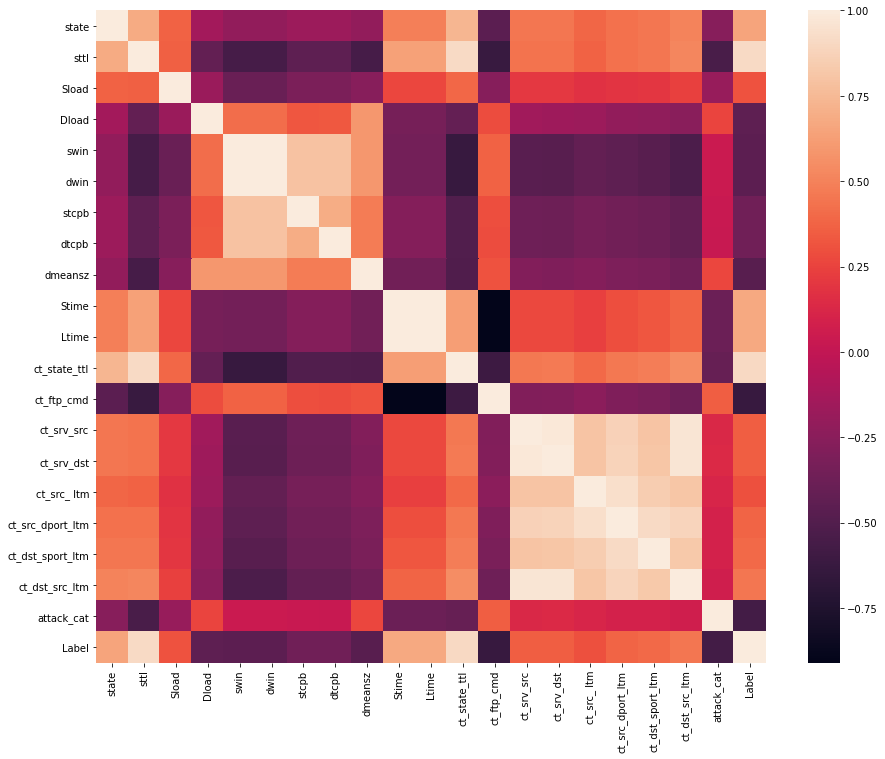

In [23]:
df2 = df2[[col for col in df2 if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df2.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [24]:
df2.head()

,state,sttl,Sload,Dload,swin,dwin,stcpb,dtcpb,dmeansz,Stime,...,ct_state_ttl,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,2.0,31,5.047801e+05,6.271510e+05,0,0,0,0,82,1424228654,...,0,0.0,2,3,9,1,1,1,8.0,0
1,5.0,60,1.508571e+08,0.000000e+00,0,0,0,0,0,1424230503,...,0,0.0,57,57,56,56,20,57,8.0,0
2,4.0,31,1.930670e+06,1.467602e+07,255,255,3749459648,1621172393,463,1424219965,...,0,0.0,3,2,6,1,1,1,8.0,0
3,4.0,254,4.031583e+03,2.730115e+03,255,255,1595364685,3437994824,59,1424227838,...,1,0.0,5,2,2,2,1,2,8.0,0
4,4.0,31,1.846902e+06,4.032078e+06,255,255,1560901437,3710780746,189,1424224020,...,0,0.0,7,7,3,2,1,3,8.0,0


In [25]:
df.head()

,state,sttl,Sload,Dload,swin,dwin,stcpb,dtcpb,dmeansz,Stime,...,ct_state_ttl,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,CON,31,5.047801e+05,6.271510e+05,0,0,0,0,82,1424228654,...,0,,2,3,9,1,1,1,Normal,0
1,INT,60,1.508571e+08,0.000000e+00,0,0,0,0,0,1424230503,...,0,,57,57,56,56,20,57,Normal,0
2,FIN,31,1.930670e+06,1.467602e+07,255,255,3749459648,1621172393,463,1424219965,...,0,,3,2,6,1,1,1,Normal,0
3,FIN,254,4.031583e+03,2.730115e+03,255,255,1595364685,3437994824,59,1424227838,...,1,,5,2,2,2,1,2,Normal,0
4,FIN,31,1.846902e+06,4.032078e+06,255,255,1560901437,3710780746,189,1424224020,...,0,,7,7,3,2,1,3,Normal,0


### Data Pre-processing

In [26]:
df.head()

,state,sttl,Sload,Dload,swin,dwin,stcpb,dtcpb,dmeansz,Stime,...,ct_state_ttl,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,CON,31,5.047801e+05,6.271510e+05,0,0,0,0,82,1424228654,...,0,,2,3,9,1,1,1,Normal,0
1,INT,60,1.508571e+08,0.000000e+00,0,0,0,0,0,1424230503,...,0,,57,57,56,56,20,57,Normal,0
2,FIN,31,1.930670e+06,1.467602e+07,255,255,3749459648,1621172393,463,1424219965,...,0,,3,2,6,1,1,1,Normal,0
3,FIN,254,4.031583e+03,2.730115e+03,255,255,1595364685,3437994824,59,1424227838,...,1,,5,2,2,2,1,2,Normal,0
4,FIN,31,1.846902e+06,4.032078e+06,255,255,1560901437,3710780746,189,1424224020,...,0,,7,7,3,2,1,3,Normal,0


In [27]:
df.tail()

,state,sttl,Sload,Dload,swin,dwin,stcpb,dtcpb,dmeansz,Stime,...,ct_state_ttl,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
92744,INT,254,1.520000e+08,0.000000,0,0,0,0,0,1424231126,...,2,,34,34,19,19,19,34,Generic,1
92745,FIN,62,2.534126e+03,8217.639648,255,255,211426311,3288999294,317,1424231123,...,1,,2,1,1,1,1,1,Generic,1
92746,FIN,254,9.289192e+03,3055.475830,255,255,901831901,1184966395,45,1424231127,...,1,,6,2,2,1,1,2,Fuzzers,1
92747,FIN,62,3.693980e+03,10732.401370,255,255,1357488628,3378115145,142,1424231126,...,1,,1,1,1,1,1,2,Exploits,1
92748,FIN,62,7.843290e+03,18394.382810,255,255,2151897285,3110700255,253,1424231129,...,1,,2,1,1,1,1,2,DoS,1


In [28]:
df.shape

(92749, 21)

In [29]:
df.size

1947729

In [30]:
df.columns

Index(['state', 'sttl', 'Sload', 'Dload', 'swin', 'dwin', 'stcpb', 'dtcpb',
       'dmeansz', 'Stime', 'Ltime', 'ct_state_ttl', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'attack_cat', 'Label'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92749 entries, 0 to 92748
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             92749 non-null  object 
 1   sttl              92749 non-null  int64  
 2   Sload             92749 non-null  float64
 3   Dload             92749 non-null  float64
 4   swin              92749 non-null  int64  
 5   dwin              92749 non-null  int64  
 6   stcpb             92749 non-null  int64  
 7   dtcpb             92749 non-null  int64  
 8   dmeansz           92749 non-null  int64  
 9   Stime             92749 non-null  int64  
 10  Ltime             92749 non-null  int64  
 11  ct_state_ttl      92749 non-null  int64  
 12  ct_ftp_cmd        92749 non-null  object 
 13  ct_srv_src        92749 non-null  int64  
 14  ct_srv_dst        92749 non-null  int64  
 15  ct_src_ ltm       92749 non-null  int64  
 16  ct_src_dport_ltm  92749 non-null  int64 

In [32]:
df.dtypes

state                object
sttl                  int64
Sload               float64
Dload               float64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
dmeansz               int64
Stime                 int64
Ltime                 int64
ct_state_ttl          int64
ct_ftp_cmd           object
ct_srv_src            int64
ct_srv_dst            int64
ct_src_ ltm           int64
ct_src_dport_ltm      int64
ct_dst_sport_ltm      int64
ct_dst_src_ltm        int64
attack_cat           object
Label                 int64
dtype: object

In [33]:
df.describe()

,sttl,Sload,Dload,swin,dwin,stcpb,dtcpb,dmeansz,Stime,Ltime,ct_state_ttl,ct_srv_src,ct_srv_dst,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,92749.000000,9.274900e+04,9.274900e+04,92749.000000,92749.000000,9.274900e+04,9.274900e+04,92749.000000,9.274900e+04,9.274900e+04,92749.000000,92749.000000,92749.000000,92749.000000,92749.000000,92749.000000,92749.000000,92749.000000
mean,149.376651,6.338480e+07,1.295593e+06,108.860742,108.778262,9.204236e+08,9.186585e+08,168.139495,1.423646e+09,1.423646e+09,1.017585,10.737658,10.586292,7.650929,5.869799,4.338451,9.477277,0.568729
std,109.523983,1.384780e+08,3.295951e+06,126.130883,126.118666,1.340995e+09,1.337886e+09,293.612841,9.881519e+05,9.881519e+05,0.953259,11.431927,11.484431,8.608757,8.742057,6.046608,11.979133,0.495257
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.421956e+09,1.421956e+09,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,31.000000,1.537925e+05,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.421972e+09,1.421972e+09,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,254.000000,1.728588e+06,3.751337e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,45.000000,1.424224e+09,1.424224e+09,1.000000,6.000000,6.000000,4.000000,1.000000,1.000000,3.000000,1.000000
75%,254.000000,8.888889e+07,6.328125e+05,255.000000,255.000000,1.797287e+09,1.792484e+09,119.000000,1.424229e+09,1.424229e+09,2.000000,17.000000,17.000000,9.000000,8.000000,7.000000,17.000000,1.000000
max,255.000000,5.468000e+09,2.106510e+07,255.000000,255.000000,4.294940e+09,4.294920e+09,1500.000000,1.424231e+09,1.424231e+09,6.000000,63.000000,62.000000,60.000000,60.000000,60.000000,63.000000,1.000000


In [34]:
df.isna().sum()

state               0
sttl                0
Sload               0
Dload               0
swin                0
dwin                0
stcpb               0
dtcpb               0
dmeansz             0
Stime               0
Ltime               0
ct_state_ttl        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_src_ ltm         0
ct_src_dport_ltm    0
ct_dst_sport_ltm    0
ct_dst_src_ltm      0
attack_cat          0
Label               0
dtype: int64

In [35]:
df["attack_cat"].value_counts()

Normal              40000
Generic             27883
Exploits            11103
 Fuzzers             4668
DoS                  4637
 Reconnaissance      3116
Analysis              608
Backdoor              370
 Shellcode            324
Worms                  40
Name: attack_cat, dtype: int64

In [36]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

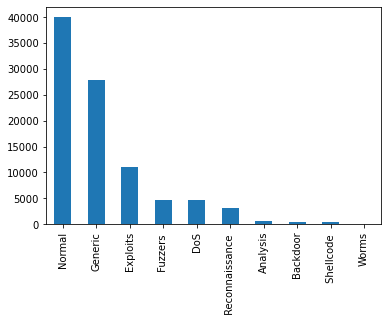

In [37]:
bar_graph('attack_cat')

In [38]:
df["state"].value_counts()

INT    42150
FIN    39381
CON    10967
REQ      234
RST        6
ECO        6
CLO        3
ACC        2
Name: state, dtype: int64

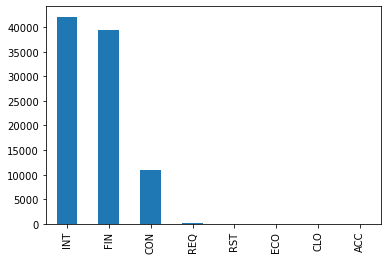

In [39]:
bar_graph("state")

In [40]:
df["ct_ftp_cmd"].value_counts()

     68142
0    23435
1     1156
2       12
4        4
Name: ct_ftp_cmd, dtype: int64

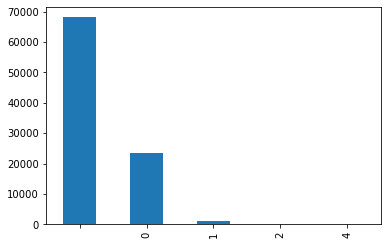

In [41]:
bar_graph("ct_ftp_cmd")

In [42]:
df["ct_ftp_cmd"]

0         
1         
2         
3         
4         
        ..
92744     
92745     
92746     
92747     
92748     
Name: ct_ftp_cmd, Length: 92749, dtype: object

In [43]:
def getXy():
    X = df2.drop(['Label'], axis=1)
    y = df2["Label"]
    
    return (X,y)

In [44]:
from sklearn.model_selection import train_test_split

def getSplittedXy(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
    return (X_train,X_test ,y_train, y_test, )

In [45]:
df.head()

,state,sttl,Sload,Dload,swin,dwin,stcpb,dtcpb,dmeansz,Stime,...,ct_state_ttl,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,CON,31,5.047801e+05,6.271510e+05,0,0,0,0,82,1424228654,...,0,,2,3,9,1,1,1,Normal,0
1,INT,60,1.508571e+08,0.000000e+00,0,0,0,0,0,1424230503,...,0,,57,57,56,56,20,57,Normal,0
2,FIN,31,1.930670e+06,1.467602e+07,255,255,3749459648,1621172393,463,1424219965,...,0,,3,2,6,1,1,1,Normal,0
3,FIN,254,4.031583e+03,2.730115e+03,255,255,1595364685,3437994824,59,1424227838,...,1,,5,2,2,2,1,2,Normal,0
4,FIN,31,1.846902e+06,4.032078e+06,255,255,1560901437,3710780746,189,1424224020,...,0,,7,7,3,2,1,3,Normal,0


In [59]:
df2.head()

,state,sttl,Sload,Dload,swin,dwin,stcpb,dtcpb,dmeansz,Stime,...,ct_state_ttl,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,2.0,31,5.047801e+05,6.271510e+05,0,0,0,0,82,1424228654,...,0,0.0,2,3,9,1,1,1,8.0,0
1,5.0,60,1.508571e+08,0.000000e+00,0,0,0,0,0,1424230503,...,0,0.0,57,57,56,56,20,57,8.0,0
2,4.0,31,1.930670e+06,1.467602e+07,255,255,3749459648,1621172393,463,1424219965,...,0,0.0,3,2,6,1,1,1,8.0,0
3,4.0,254,4.031583e+03,2.730115e+03,255,255,1595364685,3437994824,59,1424227838,...,1,0.0,5,2,2,2,1,2,8.0,0
4,4.0,31,1.846902e+06,4.032078e+06,255,255,1560901437,3710780746,189,1424224020,...,0,0.0,7,7,3,2,1,3,8.0,0


In [46]:
df.to_csv("df_reduced_feature.csv")
df2.to_csv("df_reduced_feature_encoded.csv")

##### In this notebook features are encoded with OridinalEncoder and are reduced based on correlation and usaility. Finally the two datasets i.e original and encoded are saved in a new csv file 